#### hello boys

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import holidays

In [24]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [26]:
df.describe()   

,Unnamed: 0,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,196719.500000,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,113576.489292,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,0.000000,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,98359.750000,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,196719.500000,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,295079.250000,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,393439.000000,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


In [27]:
df.isnull().sum()   

Unnamed: 0        0
datetime          0
Power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [28]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [29]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [30]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


/tmp/ipykernel_12711/245227638.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


In [31]:
df.isnull().sum()

datetime        0
Power demand    0
temp            0
year            0
month           0
date            0
day             0
dtype: int64

In [32]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


In [33]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [34]:
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0


In [ ]:
indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

print(df.head(50).columns)

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday'],
      dtype='object')


In [46]:
df_demo = df[(df["year"] == 2021) & (df["month"] == 1) & (df["date"] == 26)]
df_demo.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday
599,2021-01-26 00:00:00,24259.05,10.5,2021,1,26,1,0,1
600,2021-01-26 01:00:00,21242.33,9.5,2021,1,26,1,0,1
601,2021-01-26 02:00:00,19843.96,9.1,2021,1,26,1,0,1
602,2021-01-26 03:00:00,19192.37,9.1,2021,1,26,1,0,1
603,2021-01-26 04:00:00,19808.41,8.5,2021,1,26,1,0,1


In [54]:
df_2021 = df[(df["year"] == 2021)]
monthly_df_2021 = df_2021.groupby(by="month").agg({
    "Power demand": "sum",
    "temp": "mean"  
}).reset_index()
monthly_df_2021

,month,Power demand,temp
0,1,28851854.54,12.867139
1,2,22293879.30,18.596414
2,3,27154671.14,24.816944
3,4,25838875.32,29.222153
4,5,27184997.88,30.552868
5,6,34513677.93,32.206883
6,7,33094883.97,31.681422
7,8,36513004.46,30.375448
8,9,32455879.90,28.624253
9,10,27175182.48,26.241963


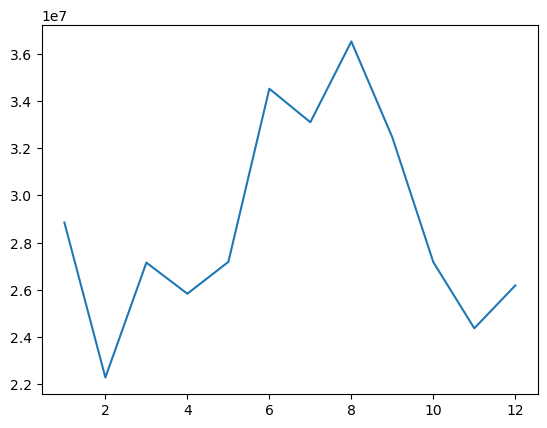

In [57]:
plt.plot(monthly_df_2021["month"],monthly_df_2021["Power demand"])
plt.show()